In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, '-', regex=True)
    
    
    return filtered_df

In [2]:
proyectos = read_csv("data/mapeo_proyectos.csv")
investigadores = read_csv("data/mapeo_investigadores.csv")
recursos = read_csv("data/mapeo_recursos.csv")

In [3]:
proyectos.columns


Index(['ID proyecto', 'Título', 'Código proyecto', 'Descripción',
       'Área de procedencia/disciplina', 'Temas de investigación', 'Programa',
       'Subprograma', 'Palabra clave AEI', 'Focalizado en HD',
       'Temporalización (inicio)', 'Temporalización (fin)', 'Convocatoria',
       'Convocatoria (año)', 'Años', 'Financiación', 'Entidad financiadora',
       'Página web y redes sociales', 'Investigadores', 'ID investigadores',
       'Fuente de información', 'Estado', 'Fecha de publicación',
       'Última actualización', 'Nº de IPs', 'Género IP', 'CCAA', 'Organismo',
       'Centro'],
      dtype='object')

In [4]:
proyectos["Financiación"] = pd.to_numeric(proyectos["Financiación"], errors='coerce')

In [5]:
recursos.columns

Index(['ID recurso', 'Título', 'Descripción', 'Tipología',
       'Año de publicación', 'Público/privado', 'Página web',
       'Proyectos relacionados', 'ID proyectos', 'Fuente de información',
       'Estado', 'Fecha de publicación', 'Última actualización'],
      dtype='object')

In [5]:
proyectos["Temas de investigación"]

0                   Análisis de imágenes | Arte rupestre
1                   Análisis de imágenes | Arte rupestre
2                                         Bases de datos
3                                         Bases de datos
4                                         Bases de datos
                             ...                        
479    Lingüística y lenguas | Lingüística computacional
480                                        Web semántica
481    Archivos, repositorios, sostenibilidad y prese...
482    Archivos, repositorios, sostenibilidad y prese...
483    Web semántica | Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 484, dtype: object

In [6]:
new_temas = [tema.split(" | ") for tema in proyectos[proyectos["Temas de investigación"].str.contains('|')]["Temas de investigación"]]
proyectos.loc[proyectos["Temas de investigación"].str.contains('|'), "Temas de investigación"] = new_temas


In [7]:
proyectos["Temas de investigación"]
# df.loc[df['Type'] == 'Fire', 'Name'] = new_names

0                  [Análisis de imágenes, Arte rupestre]
1                  [Análisis de imágenes, Arte rupestre]
2                                       [Bases de datos]
3                                       [Bases de datos]
4                                       [Bases de datos]
                             ...                        
479    [Lingüística y lenguas, Lingüística computacio...
480                                      [Web semántica]
481    [Archivos, repositorios, sostenibilidad y pres...
482    [Archivos, repositorios, sostenibilidad y pres...
483    [Web semántica, Aplicaciones y diseño para móv...
Name: Temas de investigación, Length: 484, dtype: object

In [8]:
mini = proyectos[["Organismo", "Temas de investigación"]]
grouped = mini.groupby("Organismo")

#for key, item in grouped:
 #   print(grouped.get_group(key), "\n\n")
    
# grouped.sum().reset_index().to_csv('organismo-temas.csv')

In [9]:
tema1 = proyectos.iloc[0,5]
for item in tema1: print(item)

Análisis de imágenes
Arte rupestre


In [10]:
result_df = grouped.sum().reset_index()
counter_row =  []
for index, item in result_df.iterrows():
    counter_row.append(Counter(item["Temas de investigación"]))
    
result_df["contador"] = counter_row

In [51]:
result_df

,Organismo,contador
0,-,"{'Patrimonio digital': 1, 'Ciencias y Técnicas..."
1,AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGAC...,"{'Análisis de imágenes': 3, 'Arte rupestre': 4..."
2,"ASOCIACION INDUSTRIAL DE OPTICA, COLOR E IMAGE...",{'Bibliotecas digitales': 1}
3,CENTRO DE VISION POR COMPUTADOR,"{'Archivos, repositorios, sostenibilidad y pre..."
4,FUNDACIO PER A LA UNIVERSITAT OBERTA DE CATALUNYA,"{'Artes visuales': 1, 'Comunicación digital': ..."
5,FUNDACION CONJUNTO PALEONTOLOGICO DE TERUEL,{'Sistemas de Información Geográfica y análisi...
6,INSTITUT CATALA D ARQUEOLOGIA CLASSICA,"{'Análisis de redes': 1, 'Sistemas de Informac..."
7,INSTITUTO CERVANTES,{'Ciencias de la educación': 1}
8,INSTITUTO TECNOLOGICO DE INFORMATICA,"{'Traducción': 1, 'Literatura Digital': 1, 'Bi..."
9,UNIVERSIDAD AUTONOMA DE BARCELONA,"{'Lexicografía': 2, 'Bases de datos': 3, '-': ..."


In [34]:
# https://stackoverflow.com/questions/43059235/python-stacked-barchart-from-counter-using-matplotlib

series = {}
for key in {key for keys in counter_row for key in keys}:
    series[key] = [(0 if key not in item else item[key]) for item in counter_row]

In [54]:
temas_df = pd.DataFrame.from_dict(series)

In [55]:
temas_df = janfri_df.set_index(pd.Index(result_df["Organismo"].values))

In [69]:
len(temas_df.columns)

65

FileNotFoundError: [Errno 2] No such file or directory: 'img/organismos_temas.png'

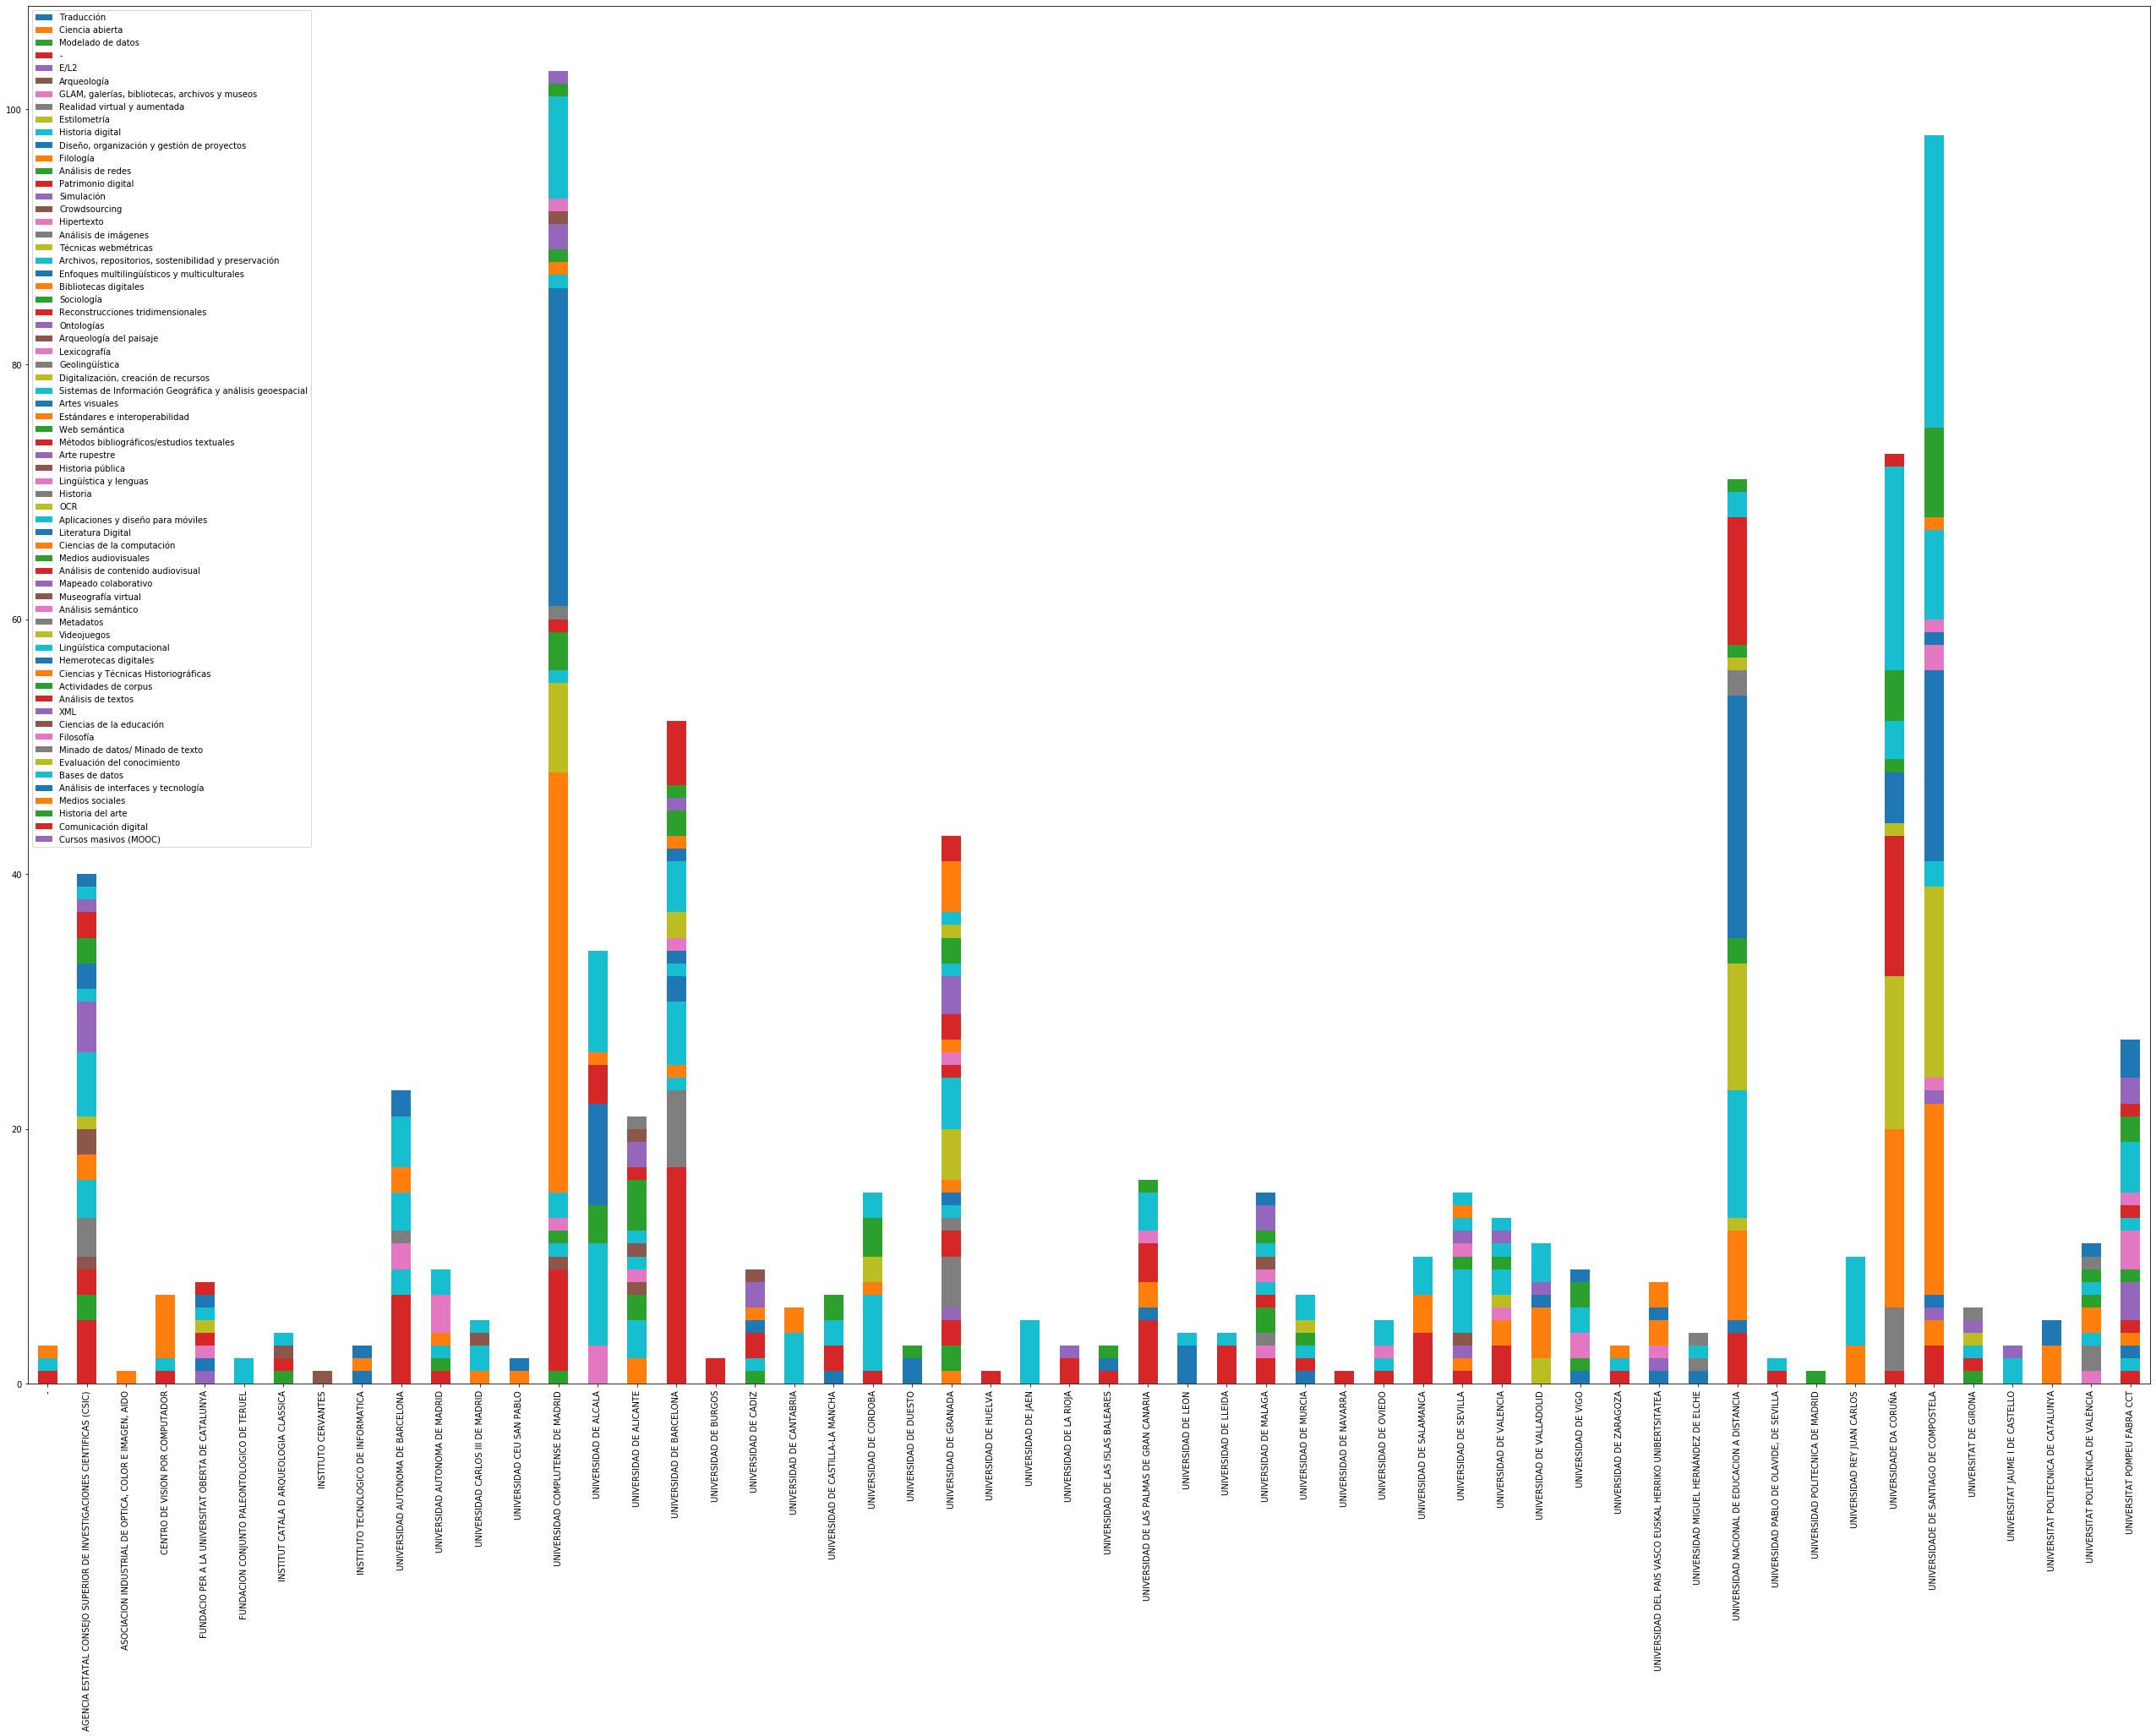

In [100]:
temas_df.plot.bar(stacked=True, figsize=(45,30))
plt.savefig('img/organismos_temas.png', dpi=300)

In [72]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [73]:
colors = sns.color_palette("cubehelix", n_colors=len(temas_df.columns))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

In [87]:
colorcitos = ["#a14b49",
"#fc60ab",
"#744232",
"#f4200d",
"#29d6e7",
"#582f40",
"#2fe43e",
"#da1547",
"#1bd94f",
"#f7a4fa",
"#92503f",
"#78677f",
"#dfdc2b",
"#8b8352",
"#da98ed",
"#fa4920",
"#8311c0",
"#7131a7",
"#62a719",
"#388744",
"#5a0618",
"#83772d",
"#e204f8",
"#44752b",
"#b92b87",
"#02c57d",
"#52544b",
"#d57fd7",
"#faaa6f",
"#a0b84d",
"#54d47a",
"#bcc057",
"#93f52f",
"#d2e9b8",
"#8f2c0c",
"#83a43e",
"#d261c5",
"#cec4cd",
"#4054e5",
"#93bd30",
"#5b3460",
"#61c10e",
"#03bbab",
"#f58206",
"#0ca3fa",
"#02c5fa",
"#f68864",
"#6921e8",
"#4cee95",
"#dd33f3",
"#3113db",
"#8b1fec",
"#15ddef",
"#b21c0e",
"#d50ddd",
"#849f7c",
"#8c0c5a",
"#88e023",
"#2d9a80",
"#c19ac3",
"#a88393",
"#1f5886",
"#52fe38",
"#c47cc7",
"#c9a550",
]

In [93]:
col2 = colorcitos.sort()

In [96]:
colorcitos

['#02c57d',
 '#02c5fa',
 '#03bbab',
 '#0ca3fa',
 '#15ddef',
 '#1bd94f',
 '#1f5886',
 '#29d6e7',
 '#2d9a80',
 '#2fe43e',
 '#3113db',
 '#388744',
 '#4054e5',
 '#44752b',
 '#4cee95',
 '#52544b',
 '#52fe38',
 '#54d47a',
 '#582f40',
 '#5a0618',
 '#5b3460',
 '#61c10e',
 '#62a719',
 '#6921e8',
 '#7131a7',
 '#744232',
 '#78677f',
 '#8311c0',
 '#83772d',
 '#83a43e',
 '#849f7c',
 '#88e023',
 '#8b1fec',
 '#8b8352',
 '#8c0c5a',
 '#8f2c0c',
 '#92503f',
 '#93bd30',
 '#93f52f',
 '#a0b84d',
 '#a14b49',
 '#a88393',
 '#b21c0e',
 '#b92b87',
 '#bcc057',
 '#c19ac3',
 '#c47cc7',
 '#c9a550',
 '#cec4cd',
 '#d261c5',
 '#d2e9b8',
 '#d50ddd',
 '#d57fd7',
 '#da1547',
 '#da98ed',
 '#dd33f3',
 '#dfdc2b',
 '#e204f8',
 '#f4200d',
 '#f58206',
 '#f68864',
 '#f7a4fa',
 '#fa4920',
 '#faaa6f',
 '#fc60ab']

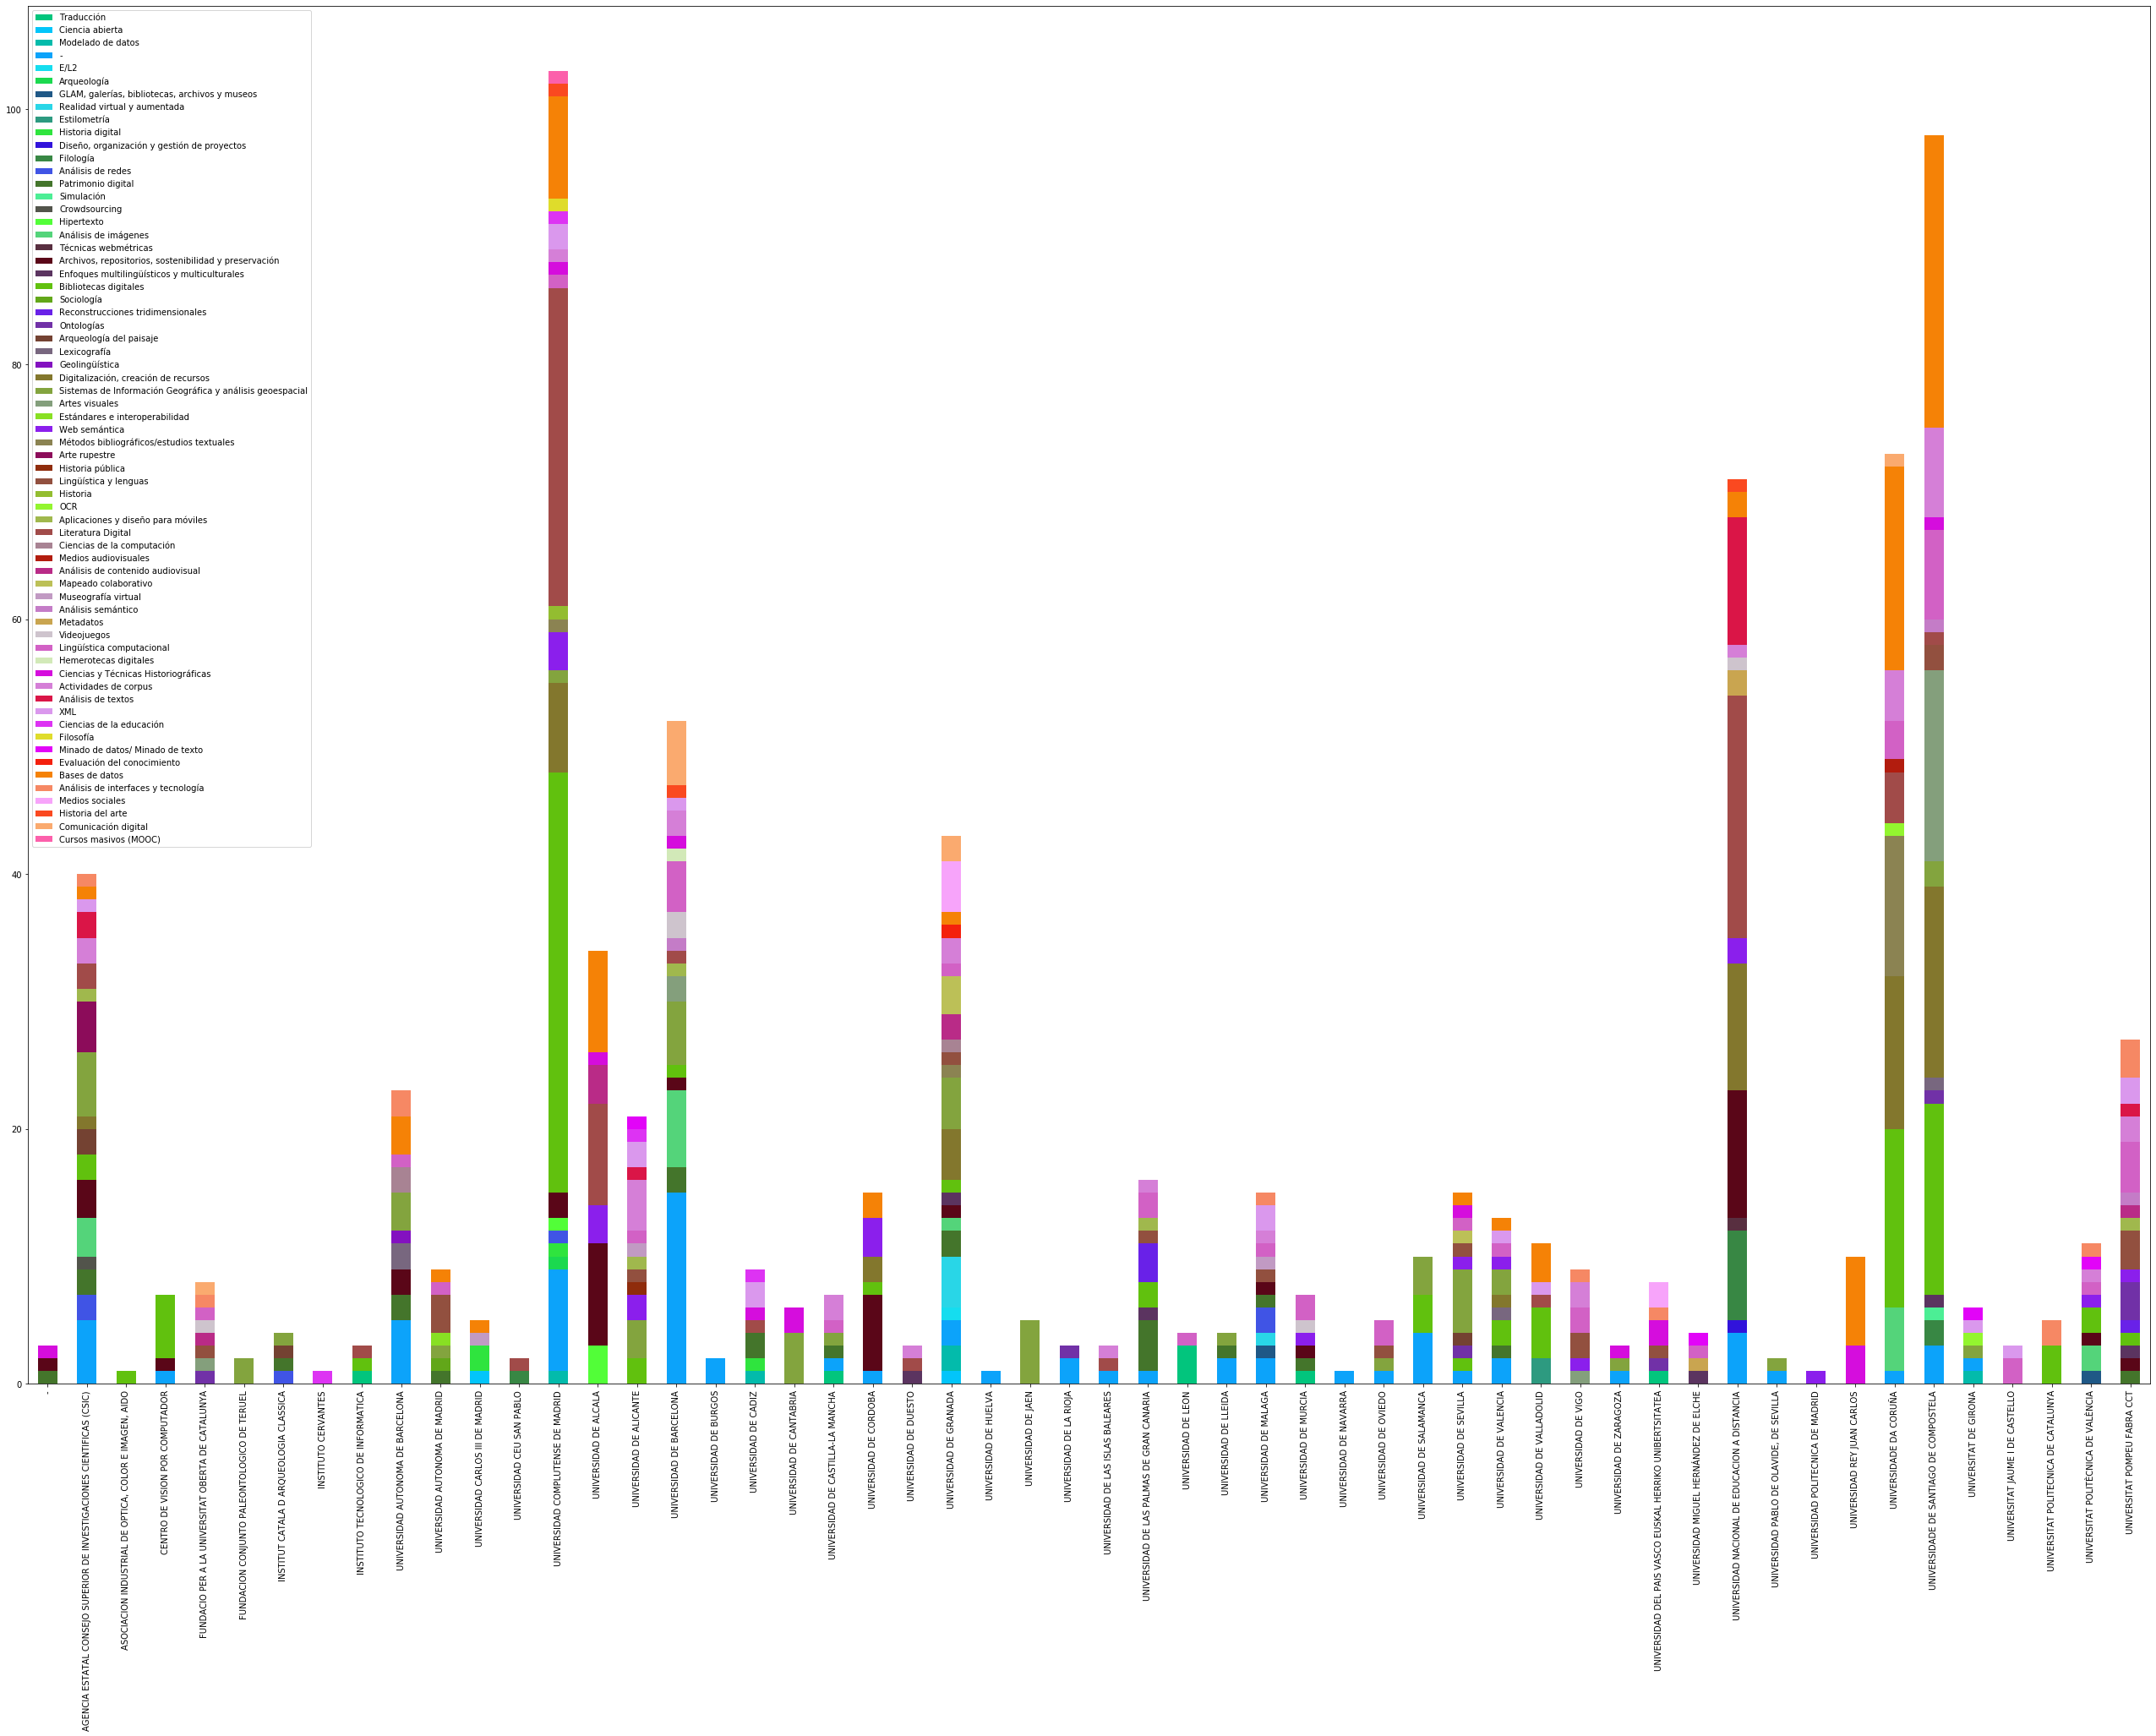

In [97]:
temas_df.plot.bar(stacked=True, figsize=(45,30), color=colorcitos)
plt.savefig('filename.png', dpi=300)